In [1]:
import pandas as pd
import json
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as cx
import xyzservices.providers as xyz
from shapely.geometry import Point

In [2]:
# family dollar
# https://www.familydollar.com/store-locator
# look for "locatorsearch?like=...
fdjson_str = """{ "response": {"collectionname":"poi","collectioncount":27,"activeobject":"","collection":[{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.548455","postalcode":"23220-4521","province":null,"longitude":"-77.465045","timezone":"America/New_York","uid":1213803658,"name":"FAMILY DOLLAR #1715","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":"Main Street Shopping Center","store_open_date":"11/02/1989 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"21715","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"1903 W Main St","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"1715","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-614-3000","_distance":"1.46","thuclose":"10:00 PM","atm":"Y","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"08:00 PM","friclose":"08:00 PM","latitude":"37.570973","postalcode":"23222-3612","province":null,"longitude":"-77.432494","timezone":"America/New_York","uid":1213807639,"name":"FAMILY DOLLAR #4247","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"08:00 PM","address2":null,"store_open_date":"08/24/2000 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"08:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"24247","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=212236BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"2917 North Ave","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"08:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"08:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"4247","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-205-5924","_distance":"2.86","thuclose":"08:00 PM","atm":"Y","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.51955","postalcode":"23225-4434","province":null,"longitude":"-77.489596","timezone":"America/New_York","uid":1213811497,"name":"FAMILY DOLLAR #6679","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"03/31/2005 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"26679","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"1208 Westover Hills Blvd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"6679","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-799-6168","_distance":"3.05","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.602932","postalcode":"23227-2949","province":null,"longitude":"-77.449875","timezone":"America/New_York","uid":-180292856,"name":"FAMILY DOLLAR #12859","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"03/25/2022 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"32859","hiring_banner_url":null,"end_date":null,"tobacco":"N","ice":"N","address1":"5205 Chamberlayne Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":null,"store":"12859","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-335-3979","_distance":"3.30","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.519726","postalcode":"23225-4142","province":null,"longitude":"-77.51257","timezone":"America/New_York","uid":1213816758,"name":"FAMILY DOLLAR #9051","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"08/26/2012 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"29051","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=208263BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"6315 Jahnke Rd.","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"9051","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-253-1979","_distance":"3.41","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.585144","postalcode":"23222-2120","province":null,"longitude":"-77.426382","timezone":"America/New_York","uid":1213811399,"name":"FAMILY DOLLAR #6591","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"11/10/2005 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"26591","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"421 E Laburnum Ave","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"6591","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"513-975-3294","_distance":"3.48","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.61525924","postalcode":"23228","province":null,"longitude":"-77.49599808","timezone":"America/New_York","uid":1463568437,"name":"FAMILY DOLLAR #12002","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"N","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"11/16/2017 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"32002","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=214256BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"7127 Staples Mill Road","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"12002","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-591-4594","_distance":"3.64","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.56924126","postalcode":"23222","province":null,"longitude":"-77.41675","timezone":"America/New_York","uid":1657146837,"name":"FAMILY DOLLAR #12045","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"04/12/2018 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"32045","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"1404 Brookland Park Ave","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"12045","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-396-6514","_distance":"3.69","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"08:00 PM","friclose":"08:00 PM","latitude":"37.51806825","postalcode":"23224-3853","province":null,"longitude":"-77.44727009","timezone":"America/New_York","uid":1213810715,"name":"FAMILY DOLLAR #6351","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"08:00 PM","address2":null,"store_open_date":"11/24/2004 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"08:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"26351","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"7 E 16th St","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"08:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"08:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"6351","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-799-6165","_distance":"3.72","thuclose":"08:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.51275328","postalcode":"23224-3673","province":null,"longitude":"-77.45799","timezone":"America/New_York","uid":1329931502,"name":"FAMILY DOLLAR #11750","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"04/27/2017 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"31750","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=213966BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"2665 Hull Street","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"11750","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-253-9773","_distance":"3.78","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"08:00 PM","friclose":"08:00 PM","latitude":"37.54016079","postalcode":"23223-5241","province":null,"longitude":"-77.41116122","timezone":"America/New_York","uid":1213810368,"name":"FAMILY DOLLAR #5701","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"08:00 PM","address2":null,"store_open_date":"05/01/2003 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"08:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"25701","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"1220 North 25th St","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"08:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"08:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"5701","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-335-3990","_distance":"4.29","thuclose":"08:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.5009577","postalcode":"23224","province":null,"longitude":"-77.47799192","timezone":"America/New_York","uid":-1948106357,"name":"FAMILY DOLLAR #12344","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"04/04/2019 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"32344","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"624 W Southside Plaza Street","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"12344","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-403-8426","_distance":"4.33","thuclose":"10:00 PM","atm":"N","temporarily_closed":"0","ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.503565","postalcode":"23225-5610","province":null,"longitude":"-77.516558","timezone":"America/New_York","uid":1213804086,"name":"FAMILY DOLLAR #2076","reopen_date":null,"satopen":"09:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"N","fresh_produce":null,"fax":null,"friopen":"09:00 AM","billpay":"Y","country":"US","wedopen":"09:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"09/23/1992 00:00:00","coming_soon":"N","sunopen":"09:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"09:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"22076","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"6520 Midlothian Turnpike","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"09:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"2076","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-401-4103","_distance":"4.51","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"09:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.576113","postalcode":"23223-1331","province":null,"longitude":"-77.395805","timezone":"America/New_York","uid":1213801808,"name":"FAMILY DOLLAR #330","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"10/11/1979 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"20330","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"3703 Mechanicsville Pike","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"330","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-401-4100","_distance":"4.90","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.487903","postalcode":"23224-2840","province":null,"longitude":"-77.497118","timezone":"America/New_York","uid":1213805151,"name":"FAMILY DOLLAR #2859","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"N","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":"Hull Street Market Place","store_open_date":"06/05/1997 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"22859","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"5620 Hull St Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"2859","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-401-4104","_distance":"5.27","thuclose":"10:00 PM","atm":"Y","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.56364668","postalcode":"23223","province":null,"longitude":"-77.37770306","timezone":"America/New_York","uid":1213820814,"name":"FAMILY DOLLAR #11378","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"04/28/2016 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"31378","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"1350 N Laburnum Avenue","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"11378","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-956-6986","_distance":"5.81","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.478612","postalcode":"23224","province":null,"longitude":"-77.479983","timezone":"America/New_York","uid":1213813980,"name":"FAMILY DOLLAR #7976","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"11/19/2009 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"27976","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"2845 Broad Rock Blvd.","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"7976","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-799-6789","_distance":"5.87","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.480588","postalcode":"23224-2636","province":null,"longitude":"-77.51292","timezone":"America/New_York","uid":1213810729,"name":"FAMILY DOLLAR #6360","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":"Haynes Chippenham","store_open_date":"07/22/2004 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"26360","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"N","address1":"6508 Hull St Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"6360","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-799-6167","_distance":"5.95","thuclose":"10:00 PM","atm":"Y","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.515514","postalcode":"23231-3428","province":null,"longitude":"-77.393342","timezone":"America/New_York","uid":1213813048,"name":"FAMILY DOLLAR #7776","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"03/20/2008 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"Y","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"27776","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"1720 Williamsburg Road","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"7776","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-799-6169","_distance":"5.96","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.480348","postalcode":"23234","province":null,"longitude":"-77.445062","timezone":"America/New_York","uid":1213803198,"name":"FAMILY DOLLAR #1377","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"03/03/1988 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"21377","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"3110 Jefferson Davis Hwy","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"1377","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-591-4035","_distance":"6.12","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.544304","postalcode":"23223-5741","province":null,"longitude":"-77.368776","timezone":"America/New_York","uid":1213816040,"name":"FAMILY DOLLAR #8100","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"02/25/2011 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"28100","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=209025BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"4805 Nine Mile Rd.","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"603.5040","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"8100","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-335-3985","_distance":"6.44","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.519729","postalcode":"23231-2355","province":null,"longitude":"-77.367607","timezone":"America/New_York","uid":1213803761,"name":"FAMILY DOLLAR #1795","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"06/20/1990 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"21795","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"3320 Williamsburg Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"804.6725","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"1795","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-401-4102","_distance":"7.05","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.551556","postalcode":"23223-3537","province":null,"longitude":"-77.341983","timezone":"America/New_York","uid":1213801525,"name":"FAMILY DOLLAR #126","reopen_date":null,"satopen":"09:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"09:00 AM","billpay":"Y","country":"US","wedopen":"09:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":"Highland Springs","store_open_date":"11/02/1978 00:00:00","coming_soon":"N","sunopen":"09:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"09:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"20126","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=209695BR","end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"6000 Nine Mile Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"09:00 AM","geofence_radius":"804.6725","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"126","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-463-9007","_distance":"7.81","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"09:00 AM"},{"second_paragraph":null,"frozen_meat":null,"main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.537228","postalcode":"23075-2014","province":null,"longitude":"-77.321996","timezone":"America/New_York","uid":1213814001,"name":"FAMILY DOLLAR #8231","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"02/11/2010 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"28231","hiring_banner_url":"https://jobs.brassring.com/1033/ASP/TG/cim_jobdetail.asp?partnerid=25600&siteid=5477&Areq=209319BR","end_date":"2021-08-26T23:59:59","tobacco":"N","ice":"N","address1":"60 S Airport Dr.","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"804.6725","monclose":"09:00 PM","city":"Highland Springs (Ri","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"8231","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-463-9031","_distance":"9.05","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"09:00 PM","friclose":"09:00 PM","latitude":"37.423317","postalcode":"23237-4453","province":null,"longitude":"-77.438745","timezone":"America/New_York","uid":1213810157,"name":"FAMILY DOLLAR #6093","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"09:00 PM","address2":null,"store_open_date":"01/20/2005 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"N","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"26093","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"7307 Taw St","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"804.6725","monclose":"09:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"09:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"6093","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-401-4101","_distance":"10.00","thuclose":"09:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.391106","postalcode":"23237-4618","province":null,"longitude":"-77.428283","timezone":"America/New_York","uid":1213801719,"name":"FAMILY DOLLAR #268","reopen_date":null,"satopen":"09:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"Y","fresh_produce":null,"fax":null,"friopen":"09:00 AM","billpay":"Y","country":"US","wedopen":"09:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"10/20/1977 00:00:00","coming_soon":"N","sunopen":"09:00 AM","propane":"Y","sunclose":"09:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"09:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"20268","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"9818 Jefferson Davis Hwy","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"09:00 AM","geofence_radius":"804.6725","monclose":"10:00 PM","city":"Richmond","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"268","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-335-2988","_distance":"12.29","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"09:00 AM"},{"second_paragraph":null,"frozen_meat":"1","main_paragraph":null,"satclose":"10:00 PM","friclose":"10:00 PM","latitude":"37.354099","postalcode":"23831-4233","province":null,"longitude":"-77.448851","timezone":"America/New_York","uid":1213806657,"name":"FAMILY DOLLAR #3656","reopen_date":null,"satopen":"08:00 AM","distributioncenter":null,"bopis":"N","_distanceuom":"mile","job_search_url":null,"h2_text":null,"adult_beverages":"N","fresh_produce":null,"fax":null,"friopen":"08:00 AM","billpay":"Y","country":"US","wedopen":"08:00 AM","adword_labels2":"Virginia","tueclose":"10:00 PM","address2":null,"store_open_date":"02/04/1999 00:00:00","coming_soon":"N","sunopen":"08:00 AM","propane":"Y","sunclose":"10:00 PM","red_box":"N","helium":"N","state":"VA","tueopen":"08:00 AM","temp_closed":"N","holidayhours":null,"h1_text":null,"dc_localpage_address":null,"clientkey":"23656","hiring_banner_url":null,"end_date":"2021-08-26T23:59:59","tobacco":"Y","ice":"Y","address1":"4411 Old Hundred Rd","hybrid_stores":"N","icon":"default","bho":null,"localpage_banner":null,"sameday_delivery":null,"wic":"Y","monopen":"08:00 AM","geofence_radius":"804.6725","monclose":"10:00 PM","city":"Chester","refrigerated_frozen":"Y","wedclose":"10:00 PM","gt_radius":"40.0000","start_date":"2020-08-18T23:59:59","store":"3656","now_open":"N","adword_labels":"Targeted Local Evergreen Locations","phone":"804-312-9166","_distance":"14.59","thuclose":"10:00 PM","atm":"N","temporarily_closed":null,"ebt":"Y","water_machine":"N","thuopen":"08:00 AM"}],"attributes":{"country":"US","radius":"15","radiusuom":"mile","centerpoint":"-77.4838,37.5635","state":"VA","city":"Richmond","address":"","province":"","postalcode":"23221"}}, "code": 1 }"""
fdjson = json.loads(fdjson_str)

In [3]:
fddf = pd.json_normalize(fdjson['response']['collection'])

In [4]:
fddf = fddf.loc[:,['latitude','longitude','postalcode','uid','name']]
fddf.to_csv('fd_ric.csv')

In [5]:
# dollar general
# https://www.dollargeneral.com/store-locator?s=Richmond%2C+VA
# look for https://www.dollargeneral.com/bin/omni/pickup/storeSearch?latitude=37.5407246&longitude=-77.4360481&radius=15&storeTypes=&storeServices=&deviceId=47864917415022751931041055902988441510&clientOriginStoreNumber=
dgjson_str = """{"stores":[{"storenumber":"15034","lat":37.515872,"lon":-77.451087,"address":"2128 Hull Street","zip":"23224-3636","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8043399558","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"13789","lat":37.570431,"lon":-77.433233,"address":"2910 North Ave.","zip":"23222-3613","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8043629034","storeindicator":2,"storeService":123086,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2000","hrsTue":"0800:2000","hrsWed":"0800:2000","hrsThu":"0800:2000","hrsFri":"0800:2000","hrsSat":"0800:2000","hrsSun":"0800:2000"},{"storenumber":"2754","lat":37.5776,"lon":-77.3954,"address":"3820a Mechanicsville Tpke","zip":"23223-1114","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8043169215","storeindicator":2,"storeService":123086,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"9624","lat":37.491927,"lon":-77.488824,"address":"5201 Hull Street Rd","zip":"23224-2423","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044958635","storeindicator":2,"storeService":123054,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"9545","lat":37.548623,"lon":-77.35558,"address":"5251 Nine Mile Rd","zip":"23223-3461","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8046668930","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"12648","lat":37.479039,"lon":-77.443796,"address":"3301 Jefferson Davis Hwy","zip":"23234-2131","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8048224120","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"19320","lat":37.60342,"lon":-77.452455,"address":"5258 Chamberlayne Rd","zip":"23227-2950","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8042560922","storeindicator":2,"storeService":123086,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2000","hrsTue":"0800:2000","hrsWed":"0800:2000","hrsThu":"0800:2000","hrsFri":"0800:2000","hrsSat":"0800:2000","hrsSun":"0800:2000"},{"storenumber":"16527","lat":37.603483,"lon":-77.425101,"address":"5210 Wilkinson Rd","zip":"23227","city":"Henrico","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"4343629010","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"13122","lat":37.468281,"lon":-77.46828,"address":"3903 Walmsley Blvd.","zip":"23234-2417","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8046668918","storeindicator":2,"storeService":123086,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2000","hrsTue":"0800:2000","hrsWed":"0800:2000","hrsThu":"0800:2000","hrsFri":"0800:2000","hrsSat":"0800:2000","hrsSun":"0800:2000"},{"storenumber":"2737","lat":37.5202,"lon":-77.3529,"address":"4750 Finlay St","zip":"23231-2856","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8042568184","storeindicator":2,"storeService":123054,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"3706","lat":37.4984,"lon":-77.5409,"address":"7828 Midlothian Turnpike","zip":"23235-5228","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044194580","storeindicator":2,"storeService":123022,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"13049","lat":37.5368,"lon":-77.32,"address":"45 South Airport Dr","zip":"23075-2013","city":"Highland Springs","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8049522810","storeindicator":2,"storeService":123086,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"3210","lat":37.6054,"lon":-77.3699,"address":"7528 Mechanicsville Tpke","zip":"23111-2144","city":"Mechanicsville","state":"VA","clickandcollect":false,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044850650","storeindicator":2,"storeService":116902,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"FedEX","serviceId":12},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"9744","lat":37.630629,"lon":-77.441598,"address":"1144 Wilkinson Rd","zip":"23227-1623","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8042154964","storeindicator":2,"storeService":123022,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"4148","lat":37.4717,"lon":-77.5271,"address":"7218 Hull St Rd","zip":"23235-5833","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044047290","storeindicator":2,"storeService":123022,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"15478","lat":37.522,"lon":-77.3084,"address":"202 E. Williamsburg Road","zip":"23150-1637","city":"Sandston","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8045574014","storeindicator":2,"storeService":125166,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"FedEX","serviceId":12},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"20288","lat":37.591151,"lon":-77.318322,"address":"6698 Cold Harbor Rd","zip":"23111-3245","city":"Mechanicsville","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8045225032","storeindicator":2,"storeService":123054,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"13061","lat":37.432863,"lon":-77.440211,"address":"6730 Jefferson Davis Hwy","zip":"23237-1219","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044497173","storeindicator":2,"storeService":125166,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"FedEX","serviceId":12},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"17081","lat":37.4531,"lon":-77.5134,"address":"6213 Belmont Rd","zip":"23832-8210","city":"Chesterfield","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8046210127","storeindicator":2,"storeService":125070,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"FedEX","serviceId":12},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"},{"storenumber":"9977","lat":37.627,"lon":-77.533,"address":"8057 W Broad St Ste C","zip":"23294-4219","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8048239090","storeindicator":2,"storeService":123054,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"6761","lat":37.6506,"lon":-77.3992,"address":"9161 Atlee Rd Ste A","zip":"23116-2536","city":"Mechanicsville","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8044177018","storeindicator":2,"storeService":123054,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0900:2000","hrsTue":"0900:2000","hrsWed":"0900:2000","hrsThu":"0900:2000","hrsFri":"0900:2000","hrsSat":"0900:2000","hrsSun":"0900:2000"},{"storenumber":"7005","lat":37.426706,"lon":-77.492042,"address":"6501 Iron Bridge Pl","zip":"23234-5300","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8049308902","storeindicator":2,"storeService":123102,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Redbox","serviceId":5},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"15266","lat":37.4458,"lon":-77.3546,"address":"2536 New Market Road","zip":"23231-7011","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8043169330","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"16878","lat":37.6663,"lon":-77.5068,"address":"10710 John Cussons Dr","zip":"23060-2031","city":"Glen Allen","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8042567330","storeindicator":2,"storeService":123118,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"Rug Doctor","serviceId":4},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"Scan Only","serviceId":2},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2100","hrsTue":"0800:2100","hrsWed":"0800:2100","hrsThu":"0800:2100","hrsFri":"0800:2100","hrsSat":"0800:2100","hrsSun":"0800:2100"},{"storenumber":"22143","lat":37.45092,"lon":-77.29905,"address":"7841 Turner Rd","zip":"23231","city":"Richmond","state":"VA","clickandcollect":true,"scanandgoactive":false,"easflag":false,"deviceinfomod":"0001-01-01T00:00:00","phone":"8042154299","storeindicator":0,"storeService":123084,"storeServices":[{"description":"BOPIS-BETA","serviceId":8},{"description":"Amerigas","serviceId":3},{"description":"BOPIS","serviceId":6},{"description":"Western Union","serviceId":7},{"description":"NCI","serviceId":16},{"description":"Multi Cultural Hair Products","serviceId":17},{"description":"BOPIS Self Service","serviceId":14},{"description":"BOPIS BETA Self Service","serviceId":15}],"storetype":1,"uuidmajor":0.0,"hrsMon":"0800:2200","hrsTue":"0800:2200","hrsWed":"0800:2200","hrsThu":"0800:2200","hrsFri":"0800:2200","hrsSat":"0800:2200","hrsSun":"0800:2200"}]}"""
dgjson = json.loads(dgjson_str)

In [6]:
dgdf = pd.json_normalize(dgjson['stores'])

In [7]:
dgdf = dgdf.loc[:,['storenumber','lat','lon','address','zip']]
dgdf.to_csv('dg_ric.csv')

In [8]:
# dollar tree
# https://www.dollartree.com/locations/va/richmond/
# look for https://www.dollartree.com/locations/ajax?&xml_request=%3Crequest%3E%3Cappkey%3EA8C798CE-700F-11E8-B4F7-4CC892322438%3C%2Fappkey%3E%3Cgeoip%3E1%3C%2Fgeoip%3E%3Cformdata+id%3D%22getlist%22%3E%3Cobjectname%3ELocator%3A%3AStore%3C%2Fobjectname%3E%3Cwhere%3E%3Ccity%3E%3Ceq%3ERichmond%3C%2Feq%3E%3C%2Fcity%3E%3C%2Fwhere%3E%3C%2Fformdata%3E%3C%2Frequest%3E
dtxml_str = """<?xml version="1.0" encoding="UTF-8"?><response code="1"><collection name="poi" count="27"><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>4000 Glenside Drive</address1>  <address2>Staples Mill Shopping Center</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>6181</clientkey>  <color_name_1>Blue</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_1_link_url>  <color_name_2>Orange</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_2_link_url>  <color_name_3>Green</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_3_link_url>  <color_name_4>Light Gold</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_light_gold_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Light-Gold-Party-Supplies/861c862c666/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.6136830769231</latitude>  <longitude>-77.4986</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-0476</phone>  <postalcode>23228-4102</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-125088171</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>7552 West Broad Street</address1>  <address2>Merchants Walk Shopping Center</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>184</clientkey>  <color_name_1>Blue</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_1_link_url>  <color_name_2>Red</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_2_link_url>  <color_name_3>Orange</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_3_link_url>  <color_name_4>Blue</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.6180911428571</latitude>  <longitude>-77.5234142857143</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-420-3128</phone>  <postalcode>23294-3608</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400219029</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>4340 S. Laburnum Avenue</address1>  <address2>Laburnum Park Shopping Center</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>508</clientkey>  <color_name_1>Black</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_1_link_url>  <color_name_2>Dark Gold</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_dark_gold_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Dark-Gold-Party-Supplies/861c862c662/index.cat</color_name_2_link_url>  <color_name_3>Blue</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_3_link_url>  <color_name_4>Dark Gold</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_dark_gold_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Dark-Gold-Party-Supplies/861c862c662/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5293801010101</latitude>  <longitude>-77.3586164646465</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-420-3126</phone>  <postalcode>23231-2418</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400218686</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>3978 Meadowdale Blvd</address1>  <address2>Meadowdale Plaza</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>2732</clientkey>  <color_name_1>Light Blue</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_light_blue_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Light-Blue-Party-Supplies/861c862c658/index.cat</color_name_1_link_url>  <color_name_2>Gray</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_gray_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Gray-Party-Supplies/861c862c660/index.cat</color_name_2_link_url>  <color_name_3>Navy</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_3_link_url>  <color_name_4>Dark Gold</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_dark_gold_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Dark-Gold-Party-Supplies/861c862c662/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square>Y</crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers></freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2>Sun: 9:00am - 9:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.4376578209925</latitude>  <longitude>-77.4673414339163</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-1310</phone>  <postalcode>23234-5547</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400216164</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>8920 Patterson Ave</address1>  <address2>Patterson Ave</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>3081</clientkey>  <color_name_1>Orange</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_1_link_url>  <color_name_2>Blue</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_2_link_url>  <color_name_3>Navy</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_3_link_url>  <color_name_4>Gray</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_gray_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Gray-Party-Supplies/861c862c660/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5951465306122</latitude>  <longitude>-77.5737844897959</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-420-3124</phone>  <postalcode>23229-6324</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>1297375436</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>67240 Gratiot Ave.</address1>  <address2>Muttonville Crossing</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>3709</clientkey>  <color_name_1>Navy</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_1_link_url>  <color_name_2>White</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_white_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/White-Party-Supplies/861c862c675/index.cat</color_name_2_link_url>  <color_name_3>Orange</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_3_link_url>  <color_name_4>Black</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>42.796822244898</latitude>  <longitude>-82.7346334693878</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>586-430-9002</phone>  <postalcode>48062-1915</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>MI</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Detroit</timezone>  <tuehours></tuehours>  <uid>1297376052</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>12000 Ridgefield Pkwy. .</address1>  <address2>Ridgefield FS</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>5883</clientkey>  <color_name_1>Red</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_1_link_url>  <color_name_2>White</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_white_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/White-Party-Supplies/861c862c675/index.cat</color_name_2_link_url>  <color_name_3>Black</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_3_link_url>  <color_name_4>Blue</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2>Sun: 10:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.62404</latitude>  <longitude>-77.63796</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-799-6462</phone>  <postalcode>23233-1525</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>1297378478</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>829 Eastern Byp</address1>  <address2>Carriage Gate</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>28</clientkey>  <color_name_1>Navy</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_1_link_url>  <color_name_2>Gray</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_gray_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Gray-Party-Supplies/861c862c660/index.cat</color_name_2_link_url>  <color_name_3>Maroon</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_maroon_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Maroon-Party-Supplies/861c862c668/index.cat</color_name_3_link_url>  <color_name_4>Red</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus>Y</dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers></freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.7313206666667</latitude>  <longitude>-84.283796</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>859-575-6404</phone>  <postalcode>40475-2569</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>KY</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400219124</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>7300 Midlothian Turnpike Suite A</address1>  <address2>Beaufont Courtyard</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>539</clientkey>  <color_name_1>Green</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_1_link_url>  <color_name_2>Light Gold</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_light_gold_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Light-Gold-Party-Supplies/861c862c666/index.cat</color_name_2_link_url>  <color_name_3>Red</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_3_link_url>  <color_name_4>Blue</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square>Y</crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 10:00pm, Tue: 8:00am - 10:00pm, Wed: 8:00am - 10:00pm, Thu: 8:00am - 10:00pm, Fri: 8:00am - 10:00pm, Sat: 8:00am - 10:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2>Sun: 9:00am - 9:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5005071042809</latitude>  <longitude>-77.5309382160271</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-718-6998</phone>  <postalcode>23225-5503</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400218648</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>1305 CarMia Way</address1>  <address2>Chesterfield Marketplace</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>1021</clientkey>  <color_name_1>Purple</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_purple_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Purple-Party-Supplies/861c862c670/index.cat</color_name_1_link_url>  <color_name_2>Green</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_2_link_url>  <color_name_3>Orange</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_3_link_url>  <color_name_4>Black</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5092883212212</latitude>  <longitude>-77.6029158716736</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-464-9004</phone>  <postalcode>23235-4785</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400218160</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>1236 Concord Ave</address1>  <address2>Hungarybrook Shopping Center</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>4116</clientkey>  <color_name_1>Dark Gold</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_dark_gold_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Dark-Gold-Party-Supplies/861c862c662/index.cat</color_name_1_link_url>  <color_name_2>Green</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_2_link_url>  <color_name_3>Black</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_3_link_url>  <color_name_4>Blue</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers></freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 10:00pm, Tue: 8:00am - 10:00pm, Wed: 8:00am - 10:00pm, Thu: 8:00am - 10:00pm, Fri: 8:00am - 10:00pm, Sat: 8:00am - 10:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.6362614505133</latitude>  <longitude>-77.4598311433272</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-1311</phone>  <postalcode>23228-6503</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>1297376837</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>7119 FM 1464 Suite 200</address1>  <address2>Bellaire Crossing</address2>  <adword_labels>Texas</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>6207</clientkey>  <color_name_1>Orange</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_1_link_url>  <color_name_2>Navy</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_2_link_url>  <color_name_3>Green</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_3_link_url>  <color_name_4>Yellow</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_yellow_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Yellow-Party-Supplies/861c862c673/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus>Y</dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 10:00pm, Tue: 9:00am - 10:00pm, Wed: 9:00am - 10:00pm, Thu: 9:00am - 10:00pm, Fri: 9:00am - 10:00pm, Sat: 9:00am - 10:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2>Sun: 9:00am - 9:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>29.69323</latitude>  <longitude>-95.75094</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>832-935-6361</phone>  <postalcode>77407</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery>Y</sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>TX</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Chicago</timezone>  <tuehours></tuehours>  <uid>287839771</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>1320 N Laburnum Ave.</address1>  <address2>Richmond</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>7215</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5626314</latitude>  <longitude>-77.3772517</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-799-6463</phone>  <postalcode>23223-2102</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>329803680</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>9825 S.  Mason Rd Suite 190</address1>  <address2>Waterside Commons</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>8590</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>29.6593994</latitude>  <longitude>-95.7348775</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>832-945-6712</phone>  <postalcode>77406-5809</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>TX</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Chicago</timezone>  <tuehours></tuehours>  <uid>329804907</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>2400 National RD West</address1>  <address2>Reid Health Center</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>8722</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>39.824981</latitude>  <longitude>-84.933975</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>765-598-7352</phone>  <postalcode>47374-4627</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>IN</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Indiana/Indianapolis</timezone>  <tuehours></tuehours>  <uid>329805055</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>5174 Nine Mile Rd</address1>  <address2>Fairfield Shoppers World</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>8931</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 10:00pm, Tue: 8:00am - 10:00pm, Wed: 8:00am - 10:00pm, Thu: 8:00am - 10:00pm, Fri: 8:00am - 10:00pm, Sat: 8:00am - 10:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5499585</latitude>  <longitude>-77.3581942</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-680-3018</phone>  <postalcode>23223-3330</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>329805257</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>502 E Laburnum Ave</address1>  <address2>502 E Laburnum Ave</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>9192</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.586688</latitude>  <longitude>-77.4251042</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-401-4157</phone>  <postalcode>23222</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>329805401</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>513 Johnny Walker Lane.</address1>  <address2>Harp&amp;39s Foods Freestander</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>7219</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>39.2728018</latitude>  <longitude>-93.9702663</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>816-615-6088</phone>  <postalcode>64085</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>MO</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Chicago</timezone>  <tuehours></tuehours>  <uid>329803684</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>6335 Jahnke Road</address1>  <address2>Parkway Shopping Center</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>7920</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5193285</latitude>  <longitude>-77.5134357</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-6368</phone>  <postalcode>23225-4142</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>329804402</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>1115 Kim Kent Dr.</address1>  <address2>1115 Kim Kent Dr</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>9243</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square>Y</crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 9:00am - 9:00pm, Tue: 9:00am - 9:00pm, Wed: 9:00am - 9:00pm, Thu: 9:00am - 9:00pm, Fri: 9:00am - 9:00pm, Sat: 9:00am - 9:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.738985</latitude>  <longitude>-84.2699489</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>575-259-1551</phone>  <postalcode>40475</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>KY</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>334940600</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>11740 W Broad St, #101</address1>  <address2>Parc Place at Short Pump</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>784</clientkey>  <color_name_1>Red</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_1_link_url>  <color_name_2>Yellow</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_yellow_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Yellow-Party-Supplies/861c862c673/index.cat</color_name_2_link_url>  <color_name_3>Maroon</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_maroon_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Maroon-Party-Supplies/861c862c668/index.cat</color_name_3_link_url>  <color_name_4>Silver</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_silver_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Silver-Party-Supplies/861c862c661/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers></freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 10:00pm, Tue: 8:00am - 10:00pm, Wed: 8:00am - 10:00pm, Thu: 8:00am - 10:00pm, Fri: 8:00am - 10:00pm, Sat: 8:00am - 10:00pm, Sun: 10:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.6525258823529</latitude>  <longitude>-77.6174758823529</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-1309</phone>  <postalcode>23233-1190</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400218378</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>5270-A Chamberlayne Rd</address1>  <address2>Brookhill Azalea</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>5216</clientkey>  <color_name_1>Light Gold</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_light_gold_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Light-Gold-Party-Supplies/861c862c666/index.cat</color_name_1_link_url>  <color_name_2>Green</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_2_link_url>  <color_name_3>Blue</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_3_link_url>  <color_name_4>White</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_white_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/White-Party-Supplies/861c862c675/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.603694139814</latitude>  <longitude>-77.4505526082147</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-614-3001</phone>  <postalcode>23227-2950</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>1297377743</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>315 Cowardin Ave</address1>  <address2>Cowardin Avenue</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>5281</clientkey>  <color_name_1>Red</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_1_link_url>  <color_name_2>Black</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_black_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Black-Party-Supplies/861c862c655/index.cat</color_name_2_link_url>  <color_name_3>Blue</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_3_link_url>  <color_name_4>White</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_white_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/White-Party-Supplies/861c862c675/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.52143</latitude>  <longitude>-77.45049</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-253-0040</phone>  <postalcode>23224-2023</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>1297377815</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image></ad1_image>  <ad1_url></ad1_url>  <ad2_image></ad2_image>  <ad2_url></ad2_url>  <ad3_image></ad3_image>  <ad3_url></ad3_url>  <address1>26952 FM 1093</address1>  <address2>Crossing at Katy Fulshear</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>7574</clientkey>  <color_name_1></color_name_1>  <color_name_1_image_url></color_name_1_image_url>  <color_name_1_link_url></color_name_1_link_url>  <color_name_2></color_name_2>  <color_name_2_image_url></color_name_2_image_url>  <color_name_2_link_url></color_name_2_link_url>  <color_name_3></color_name_3>  <color_name_3_image_url></color_name_3_image_url>  <color_name_3_link_url></color_name_3_link_url>  <color_name_4></color_name_4>  <color_name_4_image_url></color_name_4_image_url>  <color_name_4_link_url></color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 10:00pm, Tue: 8:00am - 10:00pm, Wed: 8:00am - 10:00pm, Thu: 8:00am - 10:00pm, Fri: 8:00am - 10:00pm, Sat: 8:00am - 10:00pm, Sun: 9:00am - 9:00pm</hours>  <hours2></hours2>  <hybrid_stores></hybrid_stores>  <ice_placement></ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>29.6951848</latitude>  <longitude>-95.845197</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>346-307-8020</phone>  <postalcode>77406</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>TX</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Chicago</timezone>  <tuehours></tuehours>  <uid>329804034</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>2430 Sheila Lane</address1>  <address2>Chippenham Forest</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>137</clientkey>  <color_name_1>Green</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_1_link_url>  <color_name_2>Light Gold</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_light_gold_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Light-Gold-Party-Supplies/861c862c666/index.cat</color_name_2_link_url>  <color_name_3>Red</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_3_link_url>  <color_name_4>Blue</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5339388686287</latitude>  <longitude>-77.5321358817387</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-335-3956</phone>  <postalcode>23225-2040</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone>Y</snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400219063</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>4925 West Broad Street Suite 404</address1>  <address2>Willow Lawn</address2>  <adword_labels>Virginia</adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>510</clientkey>  <color_name_1>Dark Gold</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_dark_gold_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Dark-Gold-Party-Supplies/861c862c662/index.cat</color_name_1_link_url>  <color_name_2>Green</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_2_link_url>  <color_name_3>Gray</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_gray_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Gray-Party-Supplies/861c862c660/index.cat</color_name_3_link_url>  <color_name_4>Navy</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_navy_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Navy-Blue-Party-Supplies/861c862c656/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>37.5831258536585</latitude>  <longitude>-77.4953031707317</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>804-420-3125</phone>  <postalcode>23230-3401</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>VA</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/New_York</timezone>  <tuehours></tuehours>  <uid>-1400218684</uid>  <wedhours></wedhours></poi><poi>  <name>DollarTree</name>  <ad1_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/20140111-ad.jpg</ad1_image>  <ad1_url>http://ads.dollartree.com/current_ad/</ad1_url>  <ad2_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/american-greetings.jpg</ad2_image>  <ad2_url>x</ad2_url>  <ad3_image>http://www.dollartree.com/assets/images/storelocator/_findAstore/dollar-tree/2015-spring-catalog.jpg</ad3_image>  <ad3_url>http://ads.dollartree.com/current_catalog/</ad3_url>  <address1>3513 East Main St</address1>  <address2>Walmart Plaza</address2>  <adword_labels></adword_labels>  <amazon_lockers></amazon_lockers>  <bho></bho>  <bopis>N</bopis>  <city>Richmond</city>  <clientkey>710</clientkey>  <color_name_1>Red</color_name_1>  <color_name_1_image_url>/file/general/shop_by_color_red_v2.jpg</color_name_1_image_url>  <color_name_1_link_url>/Graduation/Party-Supplies-in-School-Colors/Red-Party-Supplies/861c862c667/index.cat</color_name_1_link_url>  <color_name_2>Blue</color_name_2>  <color_name_2_image_url>/file/general/shop_by_color_blue_v2.jpg</color_name_2_image_url>  <color_name_2_link_url>/Graduation/Party-Supplies-in-School-Colors/Blue-Party-Supplies/861c862c657/index.cat</color_name_2_link_url>  <color_name_3>Orange</color_name_3>  <color_name_3_image_url>/file/general/shop_by_color_orange_v2.jpg</color_name_3_image_url>  <color_name_3_link_url>/Graduation/Party-Supplies-in-School-Colors/Orange-Party-Supplies/861c862c669/index.cat</color_name_3_link_url>  <color_name_4>Green</color_name_4>  <color_name_4_image_url>/file/general/shop_by_color_green_v2.jpg</color_name_4_image_url>  <color_name_4_link_url>/Graduation/Party-Supplies-in-School-Colors/Green-Party-Supplies/861c862c674/index.cat</color_name_4_link_url>  <country>US</country>  <crafters_square></crafters_square>  <distributioncenter></distributioncenter>  <dollartree_plus></dollartree_plus>  <ebt>Y</ebt>  <fax></fax>  <freezers>Y</freezers>  <frihours></frihours>  <h1_text></h1_text>  <h2_text></h2_text>  <holidayhours></holidayhours>  <hours>Mon: 8:00am - 9:00pm, Tue: 8:00am - 9:00pm, Wed: 8:00am - 9:00pm, Thu: 8:00am - 9:00pm, Fri: 8:00am - 9:00pm, Sat: 8:00am - 9:00pm, Sun: 9:00am - 8:00pm</hours>  <hours2>Sun: 9:00am - 8:00pm</hours2>  <hybrid_stores></hybrid_stores>  <ice_placement>1</ice_placement>  <icon>DollarTree</icon>  <job_search_url></job_search_url>  <latitude>39.8309377351499</latitude>  <longitude>-84.8541399529148</longitude>  <main_paragraph></main_paragraph>  <monhours></monhours>  <phone>765-598-7030</phone>  <postalcode>47374-5932</postalcode>  <province></province>  <reopen_date></reopen_date>  <sameday_delivery></sameday_delivery>  <sathours6></sathours6>  <second_paragraph></second_paragraph>  <snack_zone></snack_zone>  <state>IN</state>  <status></status>  <sunhours></sunhours>  <temp_closed></temp_closed>  <thuhours></thuhours>  <timezone>America/Indiana/Indianapolis</timezone>  <tuehours></tuehours>  <uid>-1400218453</uid>  <wedhours></wedhours></poi></collection></response>"""


In [28]:
dtdf = pd.read_xml(dtxml_str, xpath='/response/collection/*')\
    .loc[:,['clientkey','address1','latitude','longitude']]

In [30]:
# for some reason this locator includes some in other states. Filter to the general area
dtdf = dtdf.loc[dtdf.longitude > -78]

In [31]:
dtdf.to_csv('dt_ric.csv')

In [33]:
fddf[['longitude','latitude']] = fddf[['longitude','latitude']].apply(pd.to_numeric, errors='coerce')
#dgdf[['lon','lat']] = dgdf[['lon','lat']].apply(pd.to_numeric, errors='coerce')
#dtdf[['longitude','latitude']] = dtdf[['longitude','latitude']].apply(pd.to_numeric, errors='coerce')

fdgdf = gpd.GeoDataFrame(fddf, geometry=gpd.points_from_xy(fddf.longitude, fddf.latitude))
#fdgdf = fdgdf.to_crs(epsg=3857)
dggdf = gpd.GeoDataFrame(dgdf, geometry=gpd.points_from_xy(dgdf.lon, dgdf.lat))
dtgdf = gpd.GeoDataFrame(dtdf, geometry=gpd.points_from_xy(dtdf.longitude, dtdf.latitude))

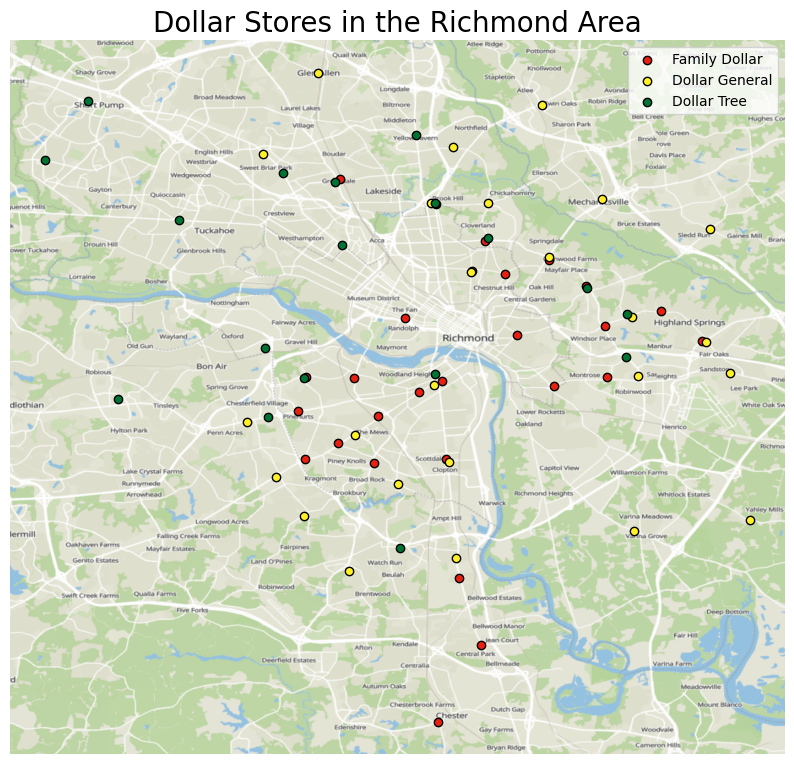

In [39]:
#extent = (167764.6575715169310570,162639.6197354011237621,186840.7322270795702934,179899.5346482172608376)

fig = plt.figure(figsize=(10,10)) # controls resolution - figure size in inches
ax = fig.add_subplot()
#ax.axis(extent)

#ric_roads = gpd.read_file('../data/Basemap/base_Road.shp', driver='ESRI Shapefile', crs="EPSG:2284")
#ric_roads = ric_roads.to_crs("EPSG:4326")
#ric_roads.plot(ax=ax, color='white', edgecolor='#eeeeee')

fdgdf.plot(ax=ax, label="Family Dollar", color="#e82011", edgecolor="black", linewidth=1)
dggdf.plot(ax=ax, label="Dollar General", color="#fff126", edgecolor="black", linewidth=1)
dtgdf.plot(ax=ax, label="Dollar Tree", color="#007533", edgecolor="black", linewidth=1)
# plot a base layer
cx.add_basemap(ax, crs="EPSG:4326", source="https://api.maptiler.com/maps/basic-v2/256/{z}/{x}/{y}.png?key=XdngPAeglh5F6tWGYvJQ")
#cx.add_basemap(ax, crs="EPSG:4326")

ax.set_title('Dollar Stores in the Richmond Area', fontsize=20)
plt.legend()

plt.axis('off')

#plt.show(fig)
plt.savefig("pics/v2.jpg", facecolor='white', bbox_inches='tight')



In [60]:
with open('scraped/taylor.holden_urichmond.json', 'r') as f:
    ur_groc = json.loads(f.read())

In [61]:
urdf = pd.json_normalize(ur_groc['features'])

In [62]:
urdf.head(2)

,attributes.OBJECTID_12_13,attributes.OBJECTID,attributes.LOCNUM,attributes.CONAME,attributes.STREET,attributes.CITY,attributes.STATE,attributes.STATE_NAME,attributes.ZIP,attributes.ZIP4,...,attributes.FRNCOD_1,attributes.ISCODE_1,attributes.SQFTCODE_1,attributes.LOC_NAME_1,attributes.STATUS_1,attributes.SCORE_1,attributes.SOURCE_1,attributes.NAICS3digits,geometry.x,geometry.y
0,1,12673446,900607649,CRUMP'S STORE,BEACH RD,CHESTERFIELD,VA,Virginia,23838,2219,...,None,None,None,None,None,NaN,None,None,339813.597085,-33608.299472
1,2,2377576,387038177,FOOD LION,COMMONS PLZ,CHESTERFIELD,VA,Virginia,23832,6453,...,None,None,None,None,None,NaN,None,None,354788.034702,-32307.016481


In [67]:
ur_gdf = gpd.GeoDataFrame(urdf, crs="EPSG:2804", geometry=gpd.points_from_xy(urdf['geometry.x'], urdf['geometry.y']))
ur_gdf = ur_gdf.to_crs("EPSG:4326")

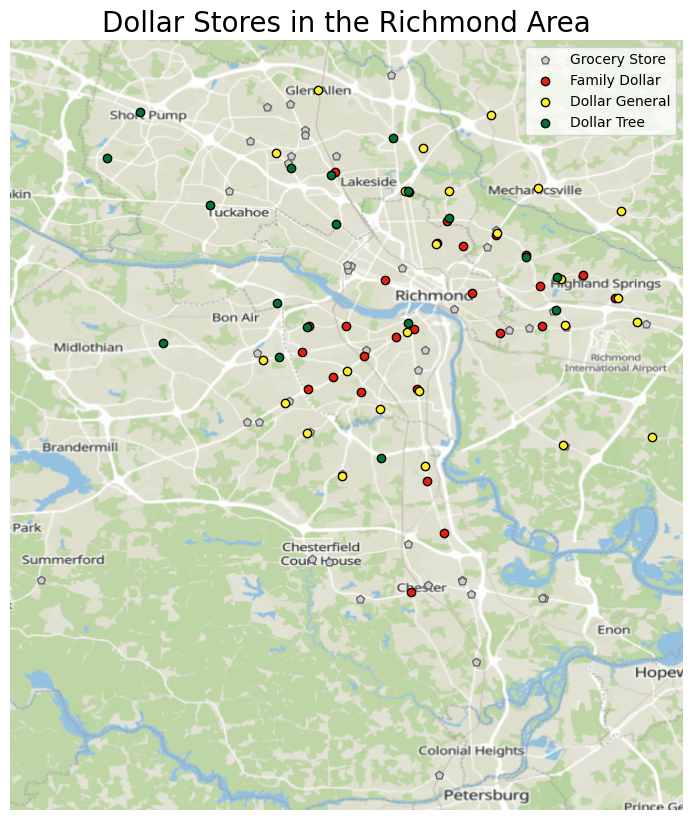

In [69]:

fig = plt.figure(figsize=(10,10)) # controls resolution - figure size in inches
ax = fig.add_subplot()

ur_gdf.plot(ax=ax, label="Grocery Store", color="#cccccc", edgecolor="#666666", linewidth=1, marker="p")

fdgdf.plot(ax=ax, label="Family Dollar", color="#e82011", edgecolor="black", linewidth=1)
dggdf.plot(ax=ax, label="Dollar General", color="#fff126", edgecolor="black", linewidth=1)
dtgdf.plot(ax=ax, label="Dollar Tree", color="#007533", edgecolor="black", linewidth=1)


# plot a base layer
cx.add_basemap(ax, crs="EPSG:4326", source="https://api.maptiler.com/maps/basic-v2/256/{z}/{x}/{y}.png?key=XdngPAeglh5F6tWGYvJQ")
#cx.add_basemap(ax, crs="EPSG:4326")

ax.set_title('Dollar Stores in the Richmond Area', fontsize=20)
plt.legend()

plt.axis('off')

#plt.show(fig)
plt.savefig("pics/v2_groc.jpg", facecolor='white', bbox_inches='tight')
